# 1. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from yellowbrick.regressor import ResidualsPlot

# Data Processing Libraries (Feature Importance)
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor

# Outlier Removal Methods
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN

# Automated Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Splitting Into Train and Test Set
from sklearn.model_selection import train_test_split

# Scaling Solutions
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Encoders
import category_encoders as ce

# Machine Learning Models for MLP Regressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 2. Load Data

In [7]:
df = pd.read_csv("/kaggle/input/the-boston-houseprice-data/boston.csv")
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


# 3. Data Cleaning

In [8]:
print("Shape of dataset:", df.shape)

Shape of dataset: (506, 14)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
def convert_Categorical(df, max_category = 10):
    for col in df.columns:
        num_category = df[col].nunique()
        if num_category < max_category:
            df[col] = df[col].astype('category')

In [12]:
convert_Categorical(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [14]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
category_columns = df.select_dtypes(include='category').columns.tolist()
df[category_columns].describe()

,CHAS,RAD
count,506,506
unique,2,9
top,0,24
freq,471,132


## 3.1 Data Visualization

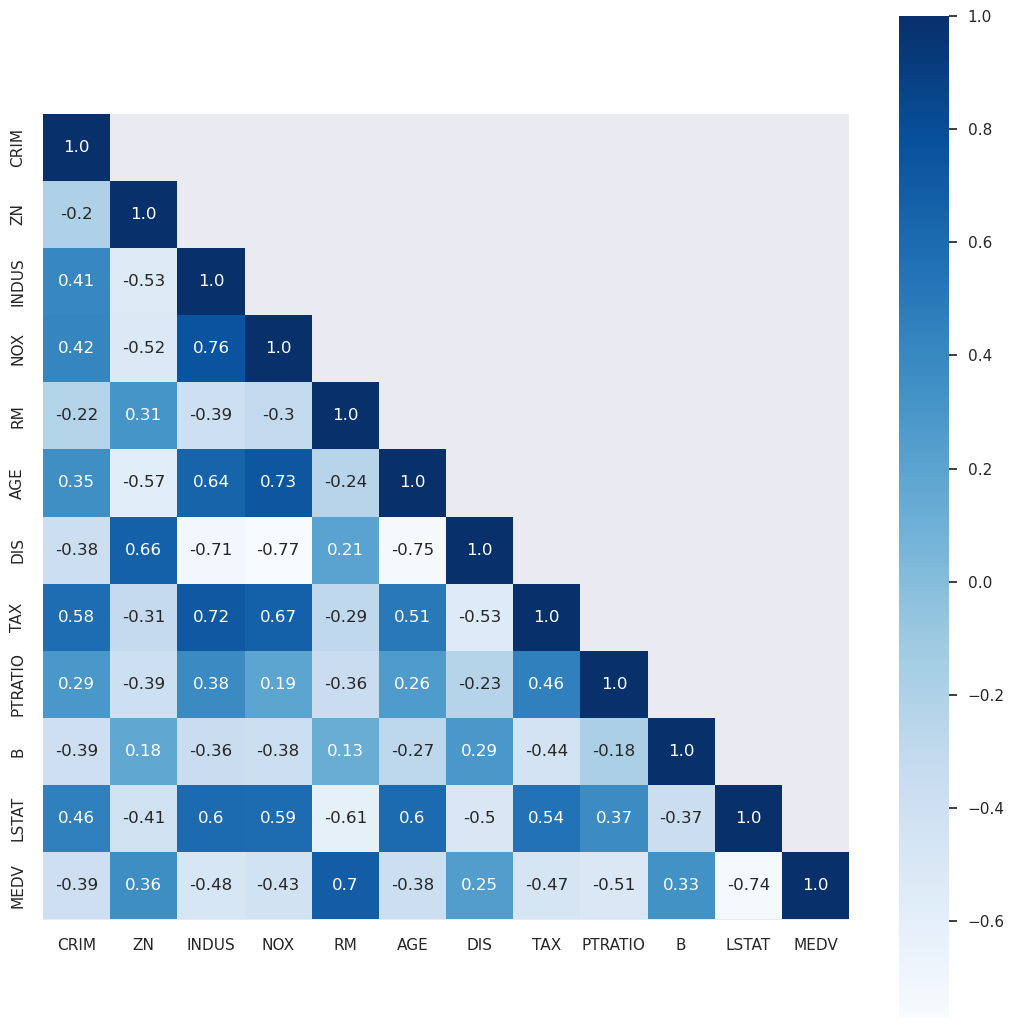

In [16]:
corr = df.corr()
mask = np.ones_like(corr)
mask = np.triu(mask,k=1)
plt.figure(figsize=(13,13))
sns.heatmap(corr, square= True, fmt='.2', annot=True, cmap='Blues',mask=mask);

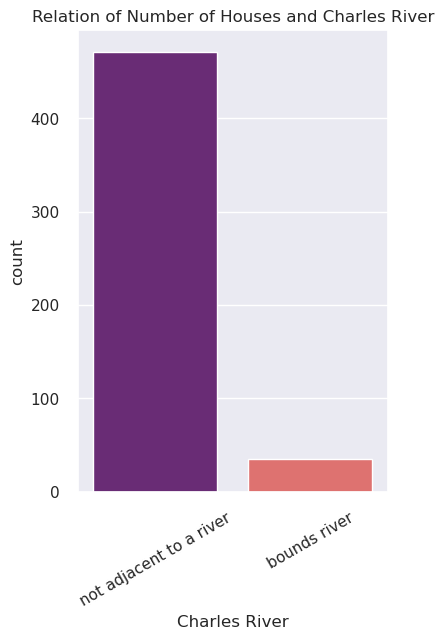

In [17]:
plt.figure(figsize=(4,6))
sns.countplot(x =category_columns[0], data = df,palette = 'magma',)
plt.xticks([0,1],['not adjacent to a river','bounds river'],rotation = 30)
plt.xlabel('Charles River')
plt.title('Relation of Number of Houses and Charles River');

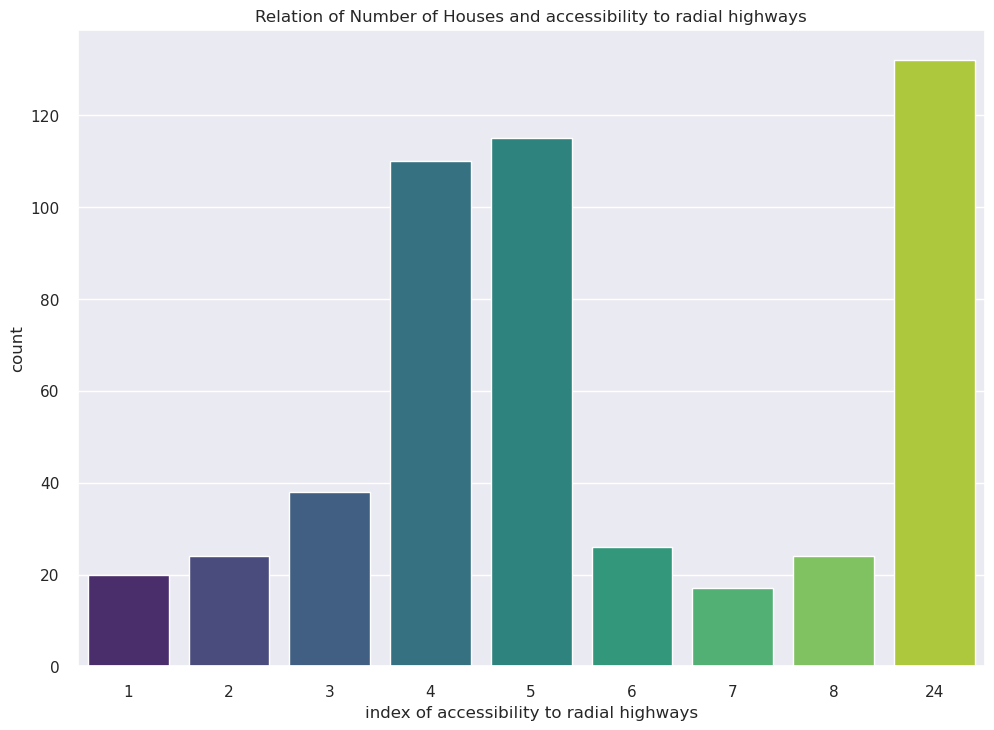

In [18]:
sns.countplot(x=category_columns[1],data=df, palette = "viridis");
plt.xlabel('index of accessibility to radial highways')
plt.title('Relation of Number of Houses and accessibility to radial highways');

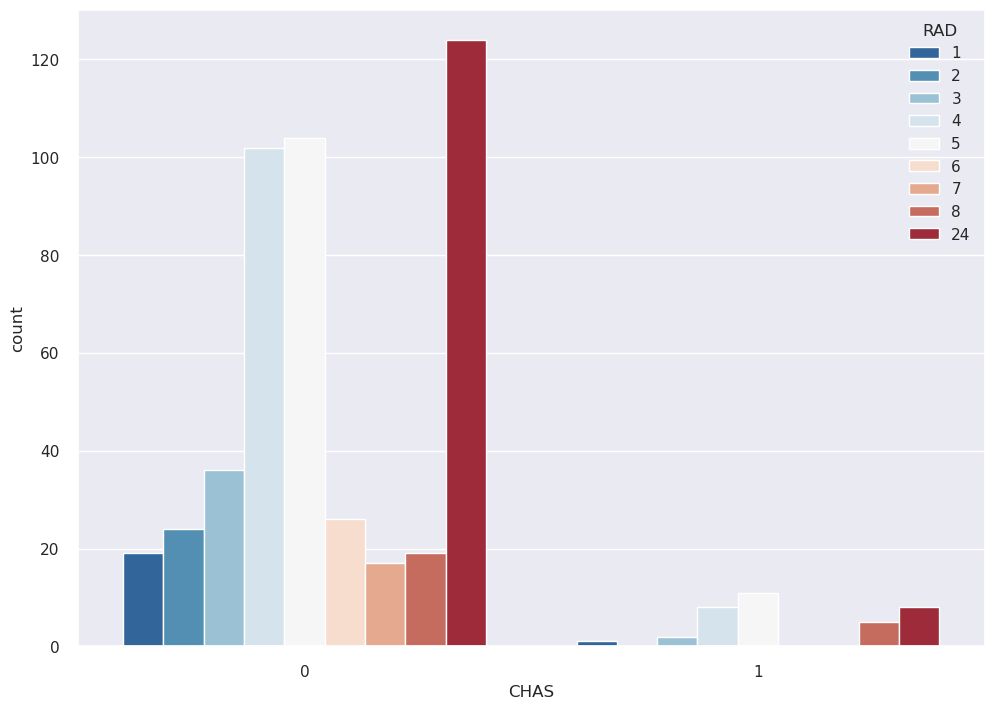

In [19]:
sns.countplot(x=category_columns[0],hue=category_columns[1],data=df,palette='RdBu_r');

In [20]:
numeric_columns = df.drop(columns=category_columns).columns.tolist()
(numeric_columns)

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

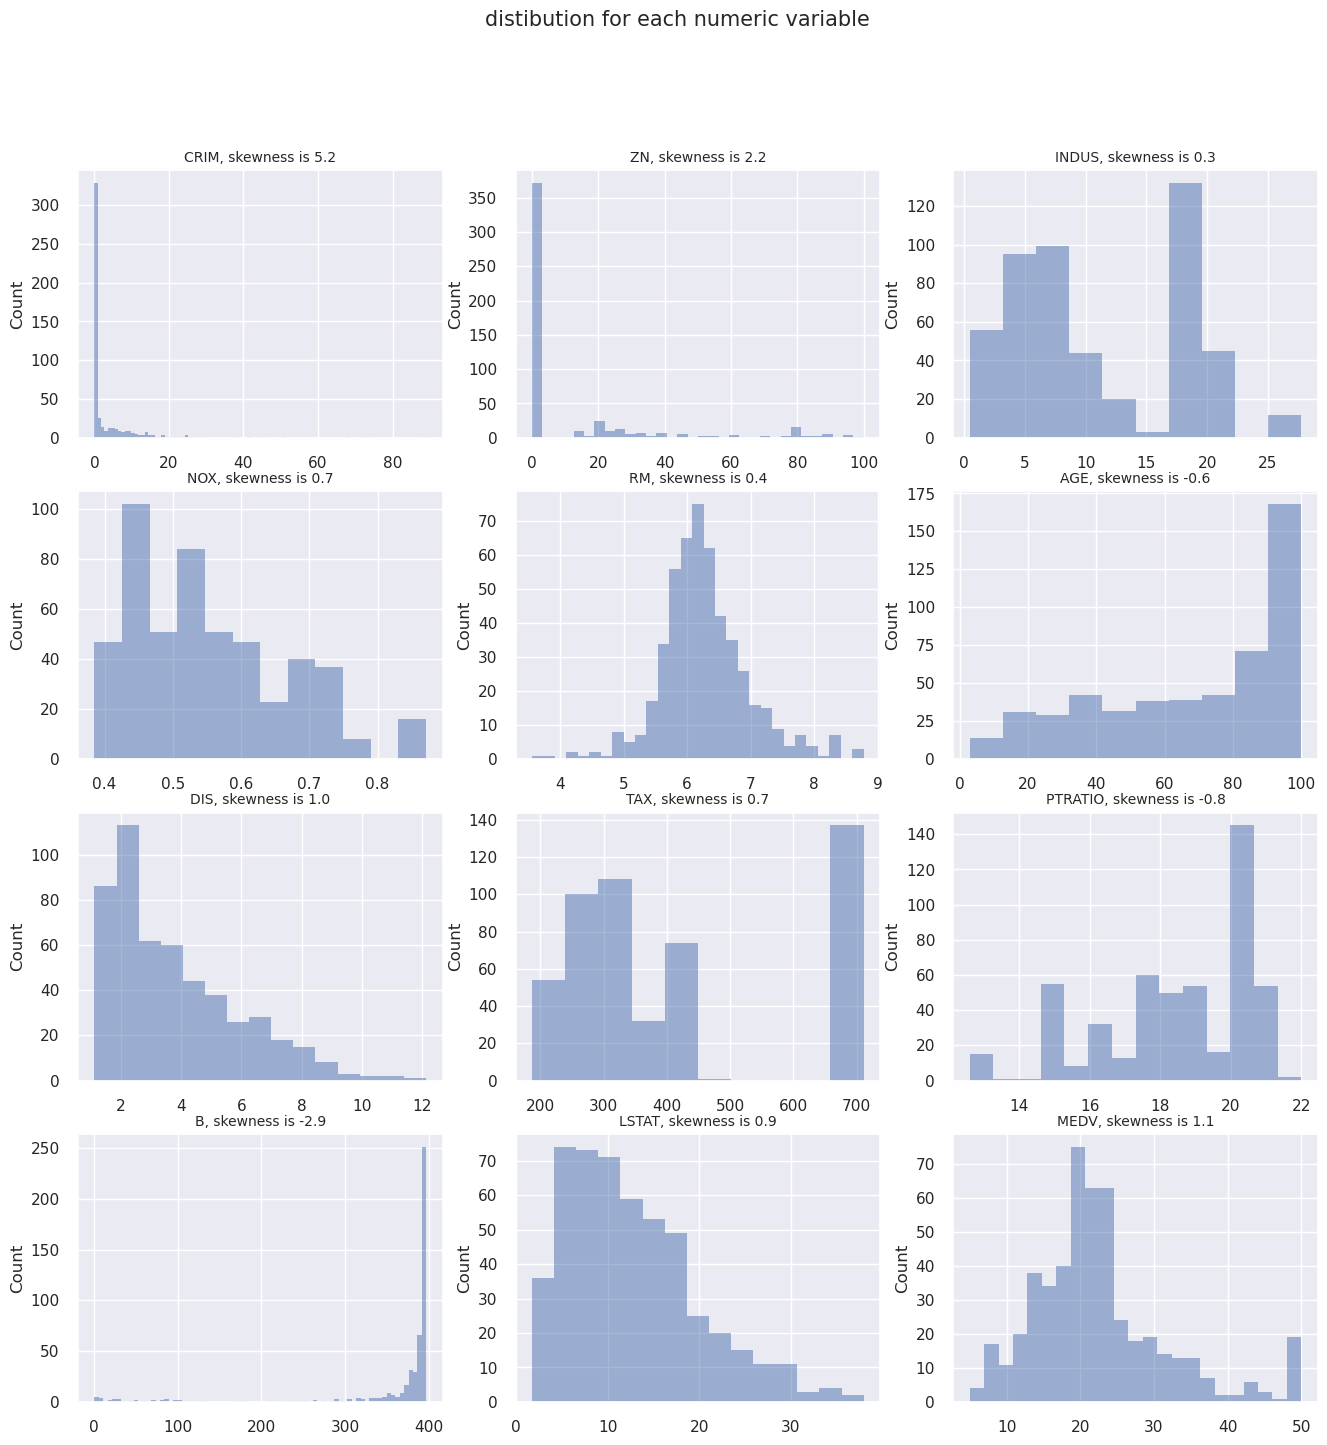

In [21]:
fig, axs = plt.subplots(4,3,figsize=(16,16),)
fig.suptitle('distibution for each numeric variable', size=15)
axs = axs.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axs[i], fill=True,alpha=.5, linewidth=0) 
    axs[i].set_xlabel('')
    axs[i].set_title(col + ', skewness is '+str(round(df[col].skew(axis = 0, skipna = True),1)),size= 10)

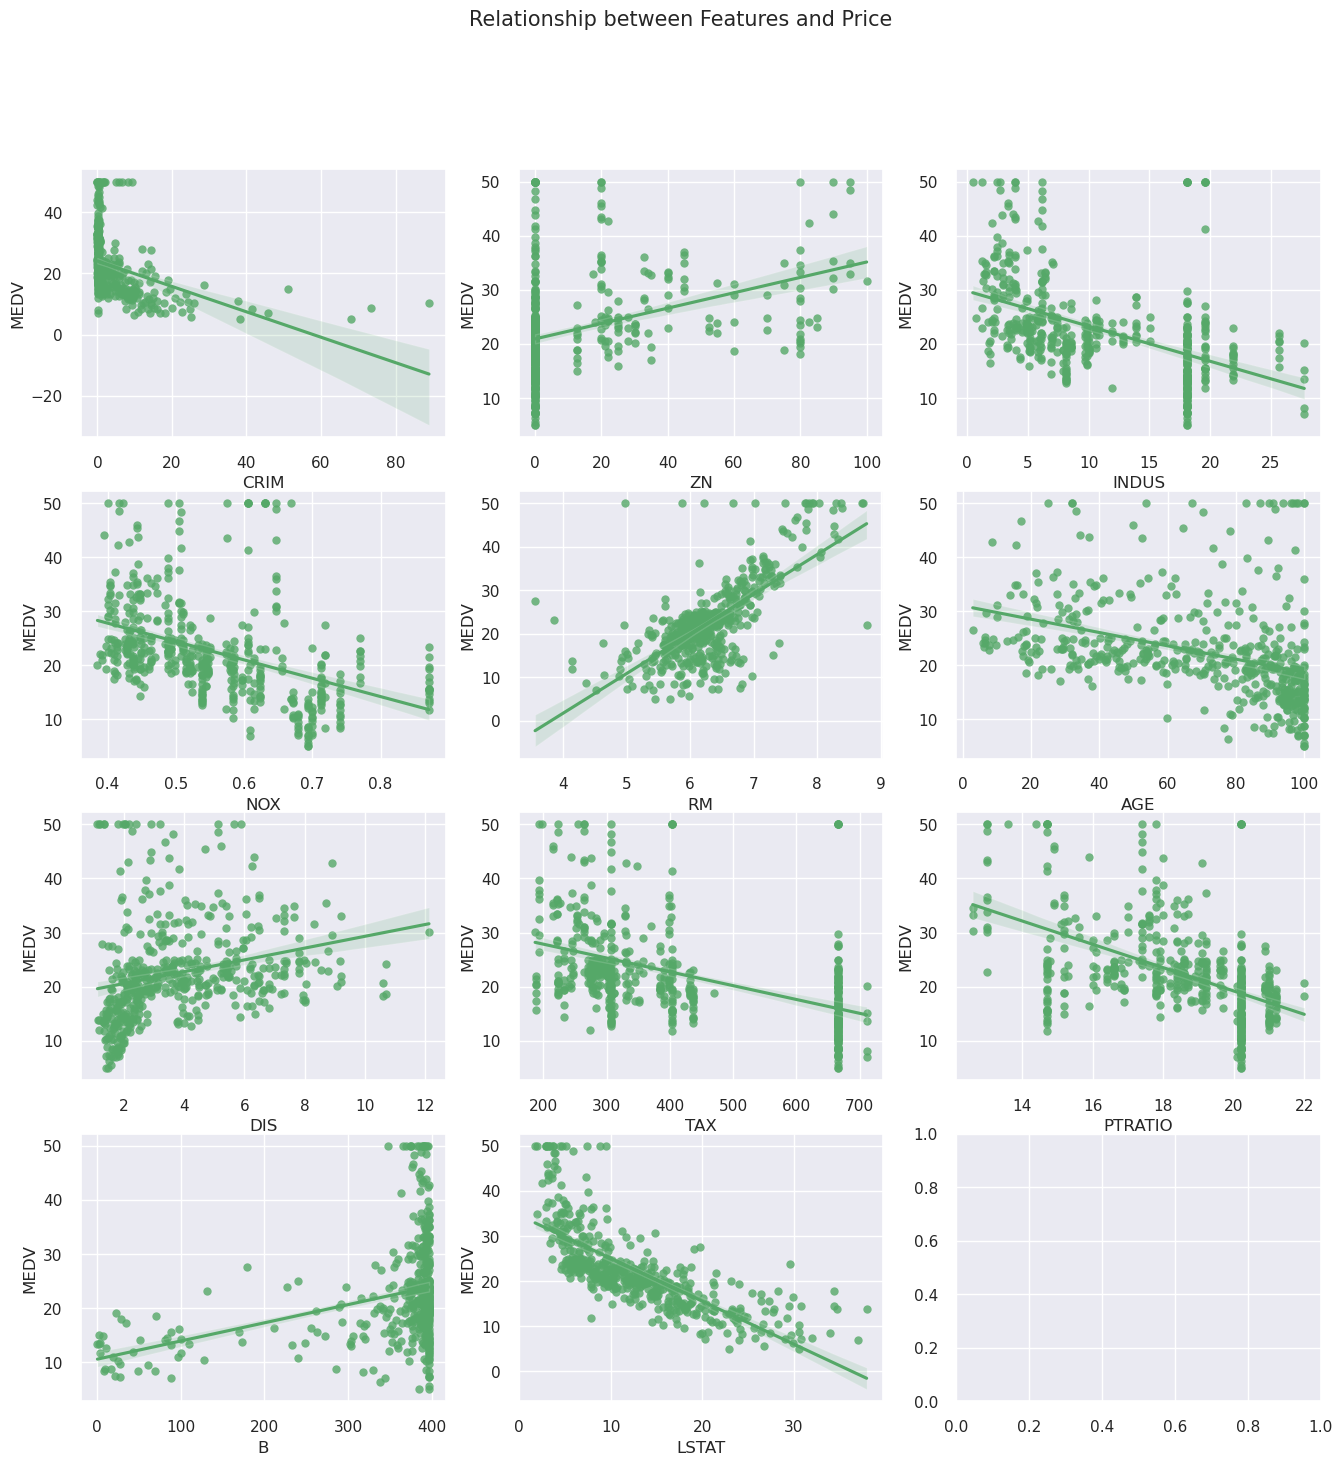

In [22]:
fig, axs = plt.subplots(4,3,figsize=(16,16),)
fig.suptitle('Relationship between Features and Price', size=15)
axs = axs.flatten()
for i, col in enumerate(numeric_columns[:-1]):
    sns.regplot(x = df[col],y = df['MEDV'], ax=axs[i],color= 'g') 

In [23]:
df = df.astype(float)

# 4. Overview on Feature Importance

## 4.1 Determining Feature Importance based on Chi2

In [24]:
X = df.drop(columns= 'MEDV') 
y = df['MEDV'] 

y = np.round(df['MEDV'])
bestfeatures = SelectKBest(score_func=chi2)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
feat_df = pd.concat([dfcolumns,dfscores],axis=1)
feat_df.columns = ['Feature','Importance'] 
feat_df

,Feature,Importance
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [25]:
feat_df = feat_df.sort_values(by=['Importance'],ascending=False)
print(feat_df.nlargest(10,'Importance'))

   Feature    Importance
9      TAX  14817.836927
1       ZN   5937.859414
0     CRIM   5503.817133
11       B   3340.486412
6      AGE   2424.308937
8      RAD   1445.257647
12   LSTAT   1430.549632
2    INDUS    873.746270
7      DIS    163.919426
3     CHAS     59.080170


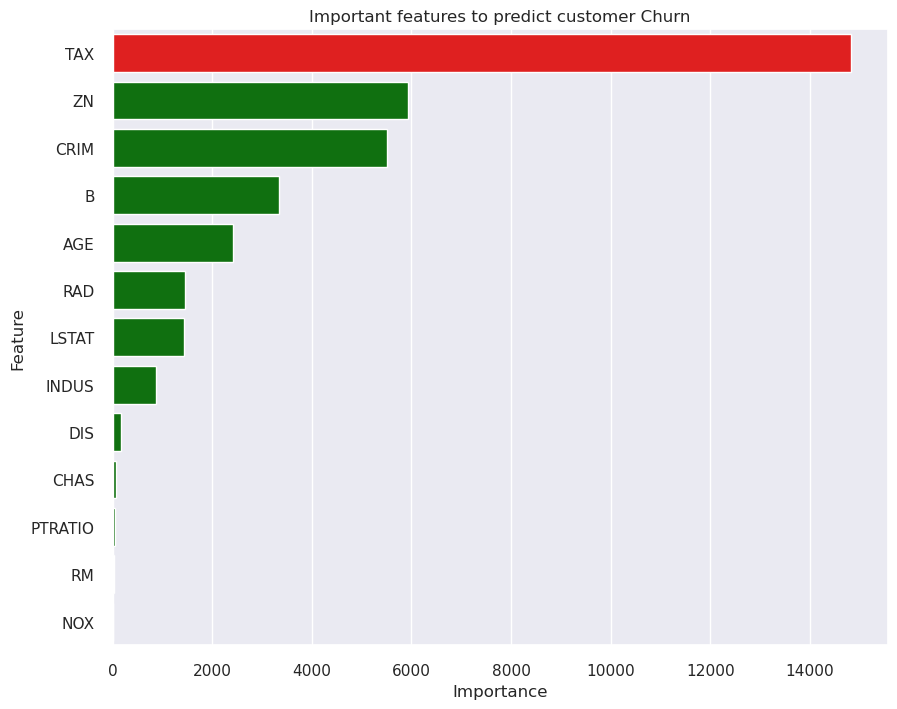

In [26]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

## 4.2 Determining Feature Importance besed on Tree Model

In [27]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [28]:
print(model.feature_importances_)

[0.11675294 0.02303143 0.04140545 0.01425293 0.0691975  0.13936351
 0.12091441 0.10752584 0.03591944 0.04467494 0.04356307 0.10678203
 0.1366165 ]


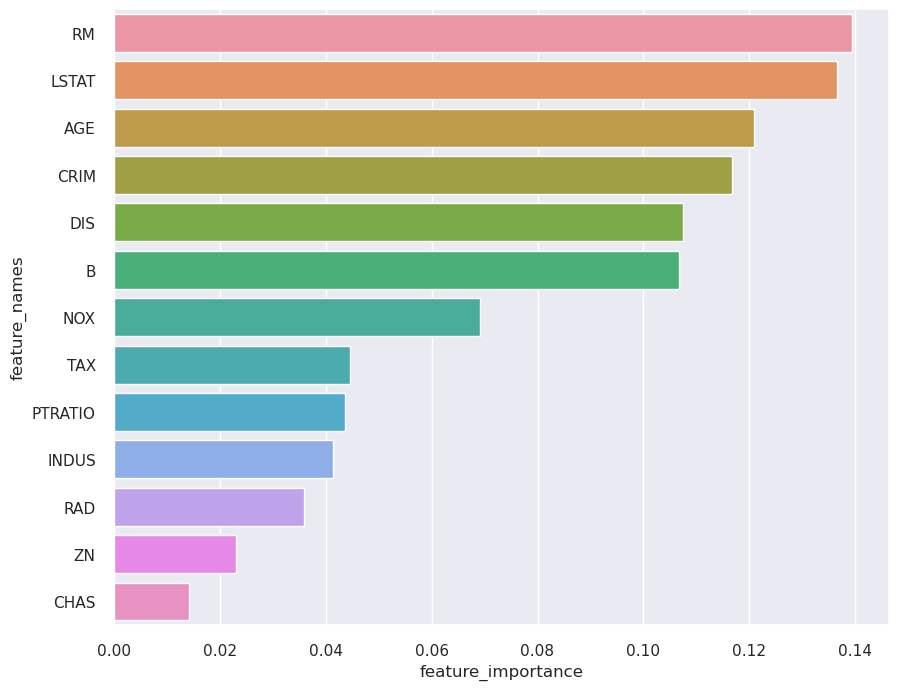

In [29]:
data={'feature_names':X.columns,'feature_importance':model.feature_importances_}
fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names']);

# 5. Outlier Removal Previews

## 5.1 Remove Outlier by IQR

In [30]:
target_column = 'MEDV'
df_1 = df.copy()
target = df_1[target_column]
features = df_1.drop(target_column, axis=1)
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1
features = features[~((features < (Q1 - 1.5 * IQR)) |(features > (Q3 + 1.5 * IQR))).any(axis=1)]

cleaned_feature_indices = features.index
df_1 = pd.concat([target.iloc[cleaned_feature_indices], features], axis=1)
df_1.reset_index(drop=True, inplace=True)

print("PRE IQR OUTLIER REMOVAL ROWS: {}".format(df.shape[0]))
print("POST IQR OUTLIER REMOVAL ROWS: {}".format(df_1.shape[0]))

PRE IQR OUTLIER REMOVAL ROWS: 506
POST IQR OUTLIER REMOVAL ROWS: 274


## 5.2 Z-Score Outlier Removal

In [31]:
df_2 = df.copy()
target = df_2[target_column]
features = df_2.drop(target_column, axis=1)
z_scores = np.abs(stats.zscore(features))
features = features[(z_scores < 3).all(axis=1)]
cleaned_feature_indices = features.index
df_2 = pd.concat([target.iloc[cleaned_feature_indices], features], axis=1)
df_2.reset_index(drop=True, inplace=True)
print("PRE Z-SCORE OUTLIER REMOVAL ROWS: {}".format(df.shape[0]))
print("POST Z-SCORE OUTLIER REMOVAL ROWS: {}".format(df_2.shape[0]))

PRE Z-SCORE OUTLIER REMOVAL ROWS: 506
POST Z-SCORE OUTLIER REMOVAL ROWS: 415


## 5.3 Outlier Removal by : 
 - isolation forest
 - local outlier factor
 - one class SVM
 - DBSCAN

In [32]:

def remove_Outliters(by, data= df,):
    df_new = data.copy()
    target = df_new[target_column]
    features = df_new.drop(target_column, axis=1)
    method = by
    y_noano = method.fit_predict(features)
    cleaned_feature_indices = features.index[y_noano == 1]
    df_new = pd.concat([target.iloc[cleaned_feature_indices], features.iloc[cleaned_feature_indices]], axis=1)
    df_new.reset_index(drop=True, inplace=True)
    return df_new

In [33]:
# Combine the target column with the cleaned feature columns
df_3 =  remove_Outliters( by= IsolationForest(n_estimators=100, contamination=0.1, random_state=42,) )

# Print the number of rows in the dataframe before and after isolation forest outlier removal
print("PRE ISOLATION FOREST OUTLIER REMOVAL ROWS: {}".format(df.shape[0]))
print("POST ISOLATION FOREST OUTLIER REMOVAL ROWS: {}".format(df_3.shape[0]))

PRE ISOLATION FOREST OUTLIER REMOVAL ROWS: 506
POST ISOLATION FOREST OUTLIER REMOVAL ROWS: 455


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [34]:
# Combine the target column with the cleaned feature columns
df_4 =  remove_Outliters(by= LocalOutlierFactor(n_neighbors=20, contamination=0.1) )

# Print the number of rows in the dataframe before and after local outlier factor outlier removal
print("PRE LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: {}".format(df.shape[0]))
print("POST LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: {}".format(df_4.shape[0]))

PRE LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: 506
POST LOCAL OUTLIER FACTOR OUTLIER REMOVAL ROWS: 455


In [35]:
# Combine the target column with the cleaned feature columns
df_5 =  remove_Outliters(by= OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1))

# Print the number of rows in the dataframe before and after one class SVM outlier removal
print("PRE ONE CLASS SVM OUTLIER REMOVAL ROWS: {}".format(df.shape[0]))
print("POST ONE CLASS SVM OUTLIER REMOVAL ROWS: {}".format(df_5.shape[0]))

PRE ONE CLASS SVM OUTLIER REMOVAL ROWS: 506
POST ONE CLASS SVM OUTLIER REMOVAL ROWS: 188


In [36]:
# Remove outliers using DBSCAN method
df_6 =  remove_Outliters( by= DBSCAN(eps=0.5, min_samples=10) )

# Print the number of rows in the dataframe before and after DBSCAN outlier removal
print("PRE DBSCAN OUTLIER REMOVAL ROWS: {}".format(df.shape[0]))
print("POST DBSCAN OUTLIER REMOVAL ROWS: {}".format(df_6.shape[0]))

PRE DBSCAN OUTLIER REMOVAL ROWS: 506
POST DBSCAN OUTLIER REMOVAL ROWS: 0


## 5.4 Outlier Removal Decision

In [37]:
df_final = df_3.copy()
print("[OUTLIER REMOVAL METHOD]\n ISOLATION FOREST\n")
print("[PRE OUTLIER REMOVAL]\n Rows: {}".format(df.shape[0]))
print("\n[POST OUTIER REMOVAL]\n Rows: {}".format(df_final.shape[0]))

[OUTLIER REMOVAL METHOD]
 ISOLATION FOREST

[PRE OUTLIER REMOVAL]
 Rows: 506

[POST OUTIER REMOVAL]
 Rows: 455


# 6. Make Train & Test Set

In [38]:
X = df_final.drop('MEDV', axis=1)
y = df_final['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Show the shapes of the training and testing sets for both the features and the target
print(f"Trainging set Features shape: {X_train.shape}")
print(f"Trainging set Target shape: {y_train.shape}")
print(f"Testing set Features shape: {X_test.shape}")
print(f"Testing set Target shape: {y_test.shape}")

Trainging set Features shape: (386, 13)
Trainging set Target shape: (386,)
Testing set Features shape: (69, 13)
Testing set Target shape: (69,)


# 7. Date Scaling

In [39]:
# Scale the training and testing data using MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
#print("[DATA SCALED USING MIN MAX SCALER]")

# Scale the training and testing data using ZScoreScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Data scaled using Z-SCORE scaler")

Data scaled using Z-SCORE scaler


# 8. Training & Evaluation Models

## 8.1 BaseLine for Data

In [40]:
class BenchmarkRegressor:
    def __init__(self):
        pass

    def fit(self, X, y, **kwargs):
        self.mean = y.mean()

    def predict(self, X):
        return [self.mean] * len(X)

In [41]:
bm_reg = BenchmarkRegressor()
bm_reg.fit(X_train, y_train)

y_train_pred_bm = bm_reg.predict(X_train)
y_pred_bm = bm_reg.predict(X_test)

r2_bm_train = r2_score(y_train,y_train_pred_bm)
r2_bm  =r2_score(y_test,y_pred_bm)

mse_bm_train = mean_squared_error(y_train,y_train_pred_bm)
mse_bm  =mean_squared_error(y_test,y_pred_bm)

print(f"R^2 Training set for BaseLine is: {r2_bm_train:0.4f}")
print(f"R^2 testing set for Base line is: {r2_bm:0.4f}")
print(f"MSE Training set for Base line is: {mse_bm_train:0.4f}")
print(f"MSE testing set for Base line is: {mse_bm:0.4f}")                            

R^2 Training set for BaseLine is: 0.0000
R^2 testing set for Base line is: -0.0014
MSE Training set for Base line is: 69.9552
MSE testing set for Base line is: 48.4911


## 8.2 Linear Regression Model

In [42]:
lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
y_train_pred_lr = lr_reg.predict(X_train)
y_pred_lr = lr_reg.predict(X_test)

r2_lr_traing = r2_score(y_train,y_train_pred_lr)
r2_lr  =r2_score(y_test,y_pred_lr)

mse_lr_traing = mean_squared_error(y_train,y_train_pred_lr)
mse_lr  =mean_squared_error(y_test,y_pred_lr)

print(f"R^2 Training set for Linear Regression is: {r2_lr_traing:0.4f}")
print(f"R^2 testing set for Linear Regression is: {r2_lr:0.4f}")
print(f"MSE Training set for Linear Regression is: {mse_lr_traing:0.4f}")
print(f"MSE testing set for Linear Regression is: {mse_lr:0.4f}")

R^2 Training set for Linear Regression is: 0.7466
R^2 testing set for Linear Regression is: 0.7433
MSE Training set for Linear Regression is: 17.7262
MSE testing set for Linear Regression is: 12.4301


## 8.3 SVR Model

In [43]:
sv_reg = SVR(kernel = 'rbf')
sv_reg.fit(X_train, y_train)
y_train_pred_svr = sv_reg.predict(X_train)
y_pred_svr = sv_reg.predict(X_test)

r2_svr_traing = r2_score(y_train,y_train_pred_svr)
r2_svr  =r2_score(y_test,y_pred_svr)

mse_svr_traing = mean_squared_error(y_train,y_train_pred_svr)
mse_svr  =mean_squared_error(y_test,y_pred_svr)

print(f"R^2 Training set for Support Vicitor Regressor is: {r2_svr_traing:0.4f}")
print(f"R^2 testing set for Support Vicitor Regressor is: {r2_svr:0.4f}")
print(f"MSE Training set for Support Vicitor Regressor is: {mse_svr_traing:0.4f}")
print(f"MSE testing set for Support Vicitor Regressor is: {mse_svr:0.4f}")

R^2 Training set for Support Vicitor Regressor is: 0.7045
R^2 testing set for Support Vicitor Regressor is: 0.8172
MSE Training set for Support Vicitor Regressor is: 20.6751
MSE testing set for Support Vicitor Regressor is: 8.8531


## 8.4 Decision Tree Model

In [44]:
dt_reg = DecisionTreeRegressor(max_depth=5,
                               max_features='auto',
                               min_samples_leaf=0.02,
                               random_state=42)
dt_reg.fit(X_train, y_train)
y_train_pred_dt = dt_reg.predict(X_train)
y_pred_dt = dt_reg.predict(X_test)

r2_dt_traing = r2_score(y_train, y_train_pred_dt)
r2_dt  =r2_score(y_test, y_pred_dt)

mse_dt_traing = mean_squared_error(y_train, y_train_pred_dt)
mse_dt  =mean_squared_error(y_test, y_pred_dt)

print(f"R^2 Training set for Decision Tree is: {r2_dt_traing:0.4f}")
print(f"R^2 testing set for Decision Tree is: {r2_dt:0.4f}")
print(f"MSE Training set for Decision Tree is: {mse_dt_traing:0.4f}")
print(f"MSE testing set for Decision Tree is: {mse_dt:0.4f}")

R^2 Training set for Decision Tree is: 0.8714
R^2 testing set for Decision Tree is: 0.7935
MSE Training set for Decision Tree is: 8.9980
MSE testing set for Decision Tree is: 9.9991


## 8.5 Random Forest

In [45]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_train_pred_rf = rf_reg.predict(X_train)
y_pred_rf = rf_reg.predict(X_test)

r2_rf_traing = r2_score(y_train, y_train_pred_rf)
r2_rf  =r2_score(y_test, y_pred_rf)

mse_rf_traing = mean_squared_error(y_train, y_train_pred_rf)
mse_rf  =mean_squared_error(y_test, y_pred_rf)

print(f"R^2 Training set for Random Forest is: {r2_rf_traing:0.4f}")
print(f"R^2 testing set for Random Forest is: {r2_rf:0.4f}")
print(f"MSE Training set for Random Forest is: {mse_rf_traing:0.4f}")
print(f"MSE testing set for Random Forest is: {mse_rf:0.4f}")

R^2 Training set for Random Forest is: 0.9787
R^2 testing set for Random Forest is: 0.8958
MSE Training set for Random Forest is: 1.4923
MSE testing set for Random Forest is: 5.0431


## 8.6 XGBoost Model

In [46]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_train_pred_xgb = xgb_reg.predict(X_train)
y_pred_xgb = xgb_reg.predict(X_test)

r2_xgb_traing = r2_score(y_train, y_train_pred_xgb)
r2_xgb  =r2_score(y_test, y_pred_xgb)

mse_xgb_traing = mean_squared_error(y_train, y_train_pred_xgb)
mse_xgb  =mean_squared_error(y_test, y_pred_xgb)

print(f"R^2 Training set for XGBoost is: {r2_xgb_traing:0.4f}")
print(f"R^2 testing set for XGBoost is: {r2_xgb:0.4f}")
print(f"MSE Training set for XGBoost is: {mse_xgb_traing:0.4f}")
print(f"MSE testing set for XGBoost is: {mse_xgb:0.4f}")

R^2 Training set for XGBoost is: 1.0000
R^2 testing set for XGBoost is: 0.9004
MSE Training set for XGBoost is: 0.0003
MSE testing set for XGBoost is: 4.8226


## 8.7 MLP Model

In [47]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(100, 100, 100),
                         activation='relu',
                         solver='adam',
                         max_iter=1000,
                         tol=0.0001, 
                         n_iter_no_change=10,
                         random_state=42,)
mlp_reg.fit(X_train, y_train)
y_train_pred_mlp = mlp_reg.predict(X_train)
y_pred_mlp = mlp_reg.predict(X_test)

r2_mlp_traing = r2_score(y_train, y_train_pred_mlp)
r2_mlp  =r2_score(y_test, y_pred_mlp)

mse_mlp_traing = mean_squared_error(y_train, y_train_pred_mlp)
mse_mlp  =mean_squared_error(y_test, y_pred_mlp)

print(f"R^2 Training set for MLP is: {r2_mlp_traing:0.4f}")
print(f"R^2 testing set for MLP is: {r2_mlp:0.4f}")
print(f"MSE Training set for MLP is: {mse_mlp_traing:0.4f}")
print(f"MSE testing set for MLP is: {mse_mlp:0.4f}")

R^2 Training set for MLP is: 0.9960
R^2 testing set for MLP is: 0.8101
MSE Training set for MLP is: 0.2784
MSE testing set for MLP is: 9.1930


## 8.8 Tuning Random Forest Hyber Parameters 

In [48]:
params_rf_reg = {
    'n_estimators': [10, 30, 50, 75,100, 200], 
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 8, 10, 15, 30]
}
# Instantiate grid_rf_reg
grid_rf_reg = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid= params_rf_reg,
                       scoring='neg_mean_squared_error',
                       cv=8,
                       verbose=1,
                       n_jobs=8)
grid_rf_reg.fit(X_train, y_train)
print(grid_rf_reg.best_params_)

Fitting 8 folds for each of 108 candidates, totalling 864 fits
{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 30}


In [49]:
tuned_rf_reg =grid_rf_reg.best_estimator_

tuned_rf_reg.fit(X_train, y_train)
y_train_pred_tuned_rf = tuned_rf_reg.predict(X_train)
y_pred_tuned_rf = tuned_rf_reg.predict(X_test)

r2_tuned_rf_traing = r2_score(y_train, y_train_pred_tuned_rf)
r2_tuned_rf  =r2_score(y_test, y_pred_tuned_rf)

mse_tuned_rf_traing = mean_squared_error(y_train, y_train_pred_tuned_rf)
mse_tuned_rf  =mean_squared_error(y_test, y_pred_tuned_rf)

print(f"R^2 Training set for Tuned Random Forest is: {r2_tuned_rf_traing:0.4f}")
print(f"R^2 testing set for Tuned Random Forest is: {r2_tuned_rf:0.4f}")
print(f"MSE Training set for Tuned Random Forest is: {mse_tuned_rf_traing:0.4f}")
print(f"MSE testing setfor Tuned Random Forest is: {mse_tuned_rf:0.4f}")

R^2 Training set for Tuned Random Forest is: 0.9826
R^2 testing set for Tuned Random Forest is: 0.9017
MSE Training set for Tuned Random Forest is: 1.2139
MSE testing setfor Tuned Random Forest is: 4.7609


## 8.9 Tuning XGBoost Hyber Parameters 

In [50]:
params_xgb_reg={'subsample':[0.9, 1],
        'max_depth':np.arange(1,10,2),
        'n_estimators':[60, 80, 100, 150, 200,],
        'learning_rate':[ 0.01, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3]}
grid_xgb_reg = GridSearchCV(estimator=XGBRegressor(),
                       param_grid= params_xgb_reg,
                       scoring='neg_mean_squared_error',
                       cv=8,
                       verbose=1,
                       n_jobs=8)
grid_xgb_reg.fit(X_train, y_train)
print(grid_xgb_reg.best_params_)

Fitting 8 folds for each of 350 candidates, totalling 2800 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


In [51]:
tuned_xgb_reg =grid_xgb_reg.best_estimator_

tuned_xgb_reg.fit(X_train, y_train)
y_train_pred_tuned_xgb = tuned_xgb_reg.predict(X_train)
y_pred_tuned_xgb = tuned_xgb_reg.predict(X_test)

r2_tuned_xgb_train = r2_score(y_train, y_train_pred_xgb)
r2_tuned_xgb  =r2_score(y_test, y_pred_tuned_xgb)

mse_tuned_xgb_train = mean_squared_error(y_train, y_train_pred_tuned_rf)
mse_tuned_xgb  =mean_squared_error(y_test, y_pred_tuned_xgb)

print(f"R^2 Training set for Tuned XGBoost is: {r2_tuned_xgb_train:0.4f}")
print(f"R^2 testing set for Tuned XGBoost is: {r2_tuned_xgb:0.4f}")
print(f"MSE Training set for Tuned XGBoost is: {mse_tuned_xgb_train:0.4f}")
print(f"MSE testing set for Tuned XGBoost is: {mse_tuned_xgb:0.4f}")

R^2 Training set for Tuned XGBoost is: 1.0000
R^2 testing set for Tuned XGBoost is: 0.9203
MSE Training set for Tuned XGBoost is: 1.2139
MSE testing set for Tuned XGBoost is: 3.8604


# 9. Evaluate This Models

In [52]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred,name_model):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 8)
    
    r2 = r2_score(y_test, y_pred)
    
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    
    CV_R2 = cv_score.mean()
    
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)

    return [name_model, r2,adjusted_r2, CV_R2, RMSE, MAE]

In [53]:
metrics_models =  []
metrics_models.append(Reg_Models_Evaluation_Metrics(lr_reg,
                                                    X_train,y_train,
                                                    X_test,y_test,y_pred_lr,
                                                    'Linear Regression'))
metrics_models.append(Reg_Models_Evaluation_Metrics(sv_reg,
                                                    X_train,y_train,
                                                    X_test,y_test,y_pred_svr,
                                                    'Support Vicitor Regressor'))
metrics_models.append(Reg_Models_Evaluation_Metrics(dt_reg,
                                                    X_train,y_train,
                                                    X_test,y_test,y_pred_dt,
                                                    'Decision Tree'))
metrics_models.append(Reg_Models_Evaluation_Metrics(rf_reg,
                                                    X_train,y_train,
                                                    X_test,y_test,y_pred_rf,
                                                    'Random Forest'))
metrics_models.append(Reg_Models_Evaluation_Metrics(xgb_reg,
                                                    X_train,y_train,
                                                    X_test,y_test,y_pred_xgb,
                                                    'XGBoost'))
metrics_models.append(Reg_Models_Evaluation_Metrics(mlp_reg,
                                                    X_train,y_train,
                                                    X_test,y_test,y_pred_mlp,
                                                    'MLP'))
metrics_models.append(Reg_Models_Evaluation_Metrics(tuned_rf_reg,
                                                    X_train,y_train,
                                                    X_test,y_test,y_pred_tuned_rf,
                                                    'Tuned Random Forest'))
metrics_models.append(Reg_Models_Evaluation_Metrics(tuned_xgb_reg,
                                                    X_train,y_train,
                                                    X_test,y_test,y_pred_tuned_xgb,
                                                    'Tuned XGBoost'))
result = pd.DataFrame(data = metrics_models, columns=['Model','R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE', 'MAE'])

In [54]:
result

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE,MAE
0,Linear Regression,0.743293,0.682617,0.698527,3.525633,2.650642
1,Support Vicitor Regressor,0.817165,0.773950,0.651366,2.975418,2.025243
2,Decision Tree,0.793498,0.744688,0.700713,3.162138,2.473331
3,Random Forest,0.895849,0.871231,0.821938,2.245694,1.706072
4,XGBoost,0.900404,0.876863,0.819771,2.196034,1.724531
5,MLP,0.810146,0.765271,0.808986,3.031993,2.374957
6,Tuned Random Forest,0.901677,0.878437,0.810054,2.181956,1.713237
7,Tuned XGBoost,0.920275,0.901431,0.846900,1.964784,1.496332


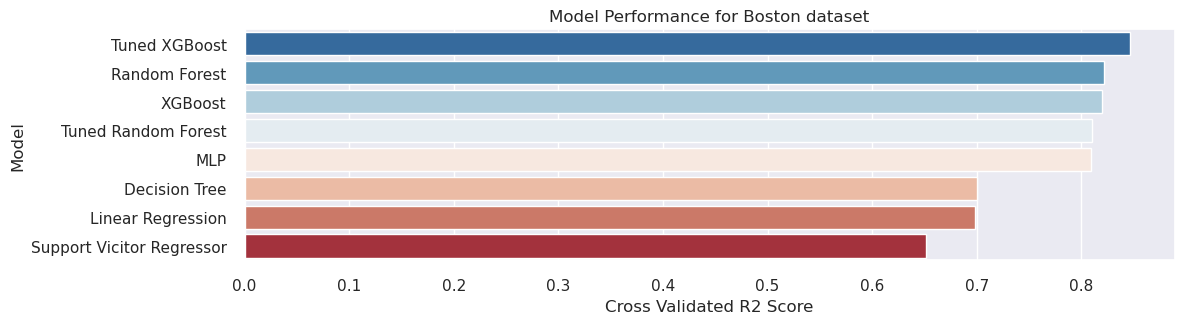

In [55]:
plt.figure(figsize = (12,3))
result.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)
sns.barplot(x='Cross Validated R2 Score', y='Model', data = result,palette='RdBu_r')
plt.xlabel('Cross Validated R2 Score')
# plt.yticks(rotation = 40)
plt.ylabel('Model')
plt.title('Model Performance for Boston dataset')
plt.show()

## 9.1 Residuals Plot for Best Model (- Tuned XGBoost -)

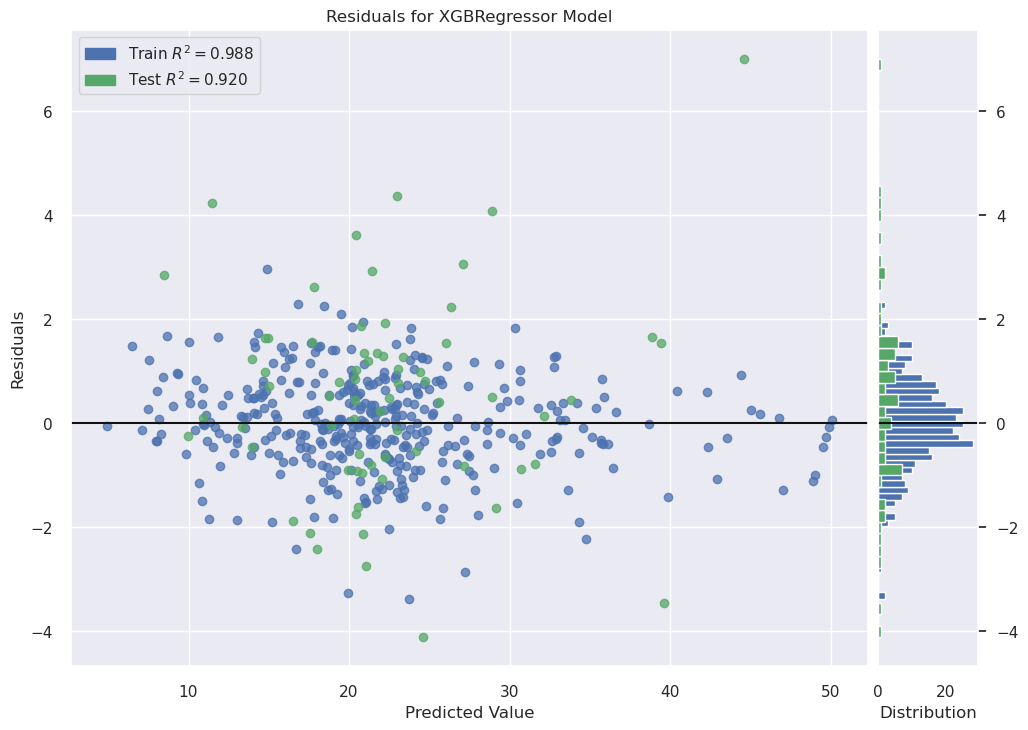

In [56]:
visualizer = ResidualsPlot(tuned_xgb_reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## 9.2 Plot Predictions for Best Model (- Tuned XgBoost -)

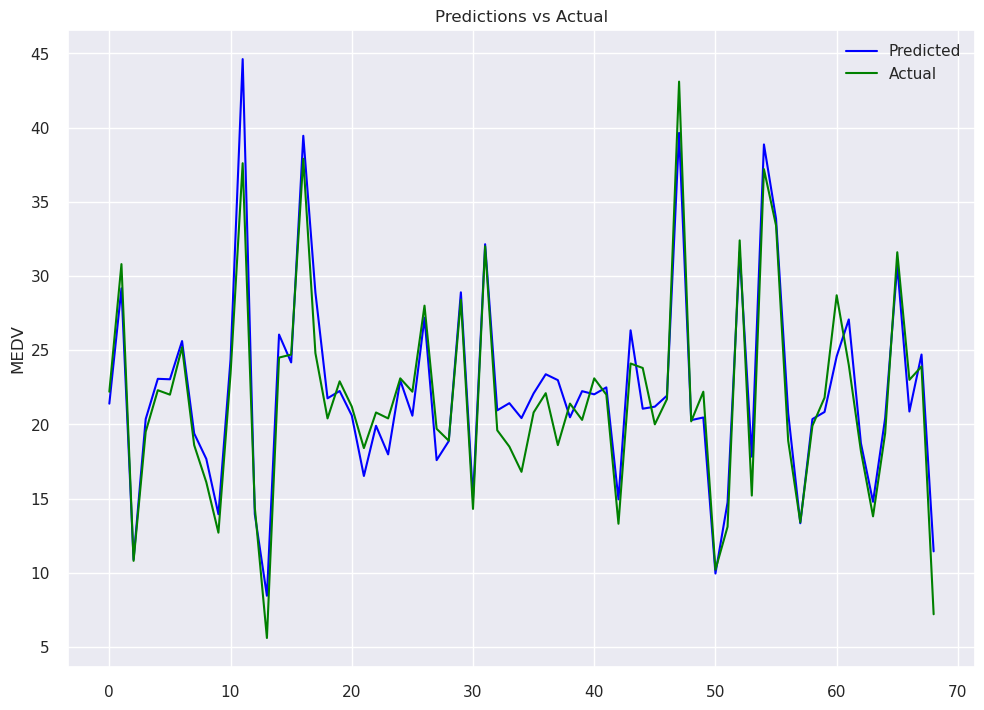

In [57]:
sns.lineplot(y_pred_tuned_xgb,  color = "blue", label='Predicted')
sns.lineplot(y_test.values,  color = "Green", label='Actual')
plt.title('Predictions vs Actual')
plt.ylabel('MEDV')
plt.legend()
plt.show()

# End
## [GitHup](https://github.com/ahmedAEAID) | [LinkedIn](https://www.linkedin.com/in/ahmed-mohamed-abd-elkader-ml/) | [Kaggle](https://www.kaggle.com/ahmedmoabdelkader/)